# Homework 8

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from util import valid, opening, closing

In [2]:
octogonal_kernel = [[-2, -1], [-2, 0], [-2, 1],
          [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
          [ 0, -2], [ 0, -1], [ 0, 0], [ 0, 1], [ 0, 2],
          [ 1, -2], [ 1, -1], [ 1, 0], [ 1, 1], [ 1, 2],
                    [ 2, -1], [ 2, 0], [ 2, 1]]

### Utility functions

In [3]:
def calc_signal_to_noise_ratio(signal, noise):
    signal_normalized = signal /  255
    noise_normalized = noise / 255
    
    mu_signal = np.mean(signal_normalized)
    mu_noise = np.mean(noise_normalized - signal_normalized)
    
    power_signal = np.mean(np.power((signal_normalized - mu_signal), 2))
    power_noise = np.mean(np.power((noise_normalized - signal_normalized - mu_noise), 2))
    
    return 20 * np.log10(np.sqrt(power_signal) / np.sqrt(power_noise))

In [4]:
def generate_kernel(shape):
    """ Rectangle kernel only
    """
    kernel = []
    for i in range(-(shape[0]-1) // 2, (shape[0]-1) // 2 + 1):
        for j in range(-(shape[1]-1) // 2, (shape[1]-1) // 2 + 1):
            kernel.append([i, j])
        
    return kernel

In [5]:
def valid(indices, shape):
    return (indices[0] >= 0 and indices[0] < shape[0] and 
            indices[1] >= 0 and indices[1] < shape[1])

### Original image

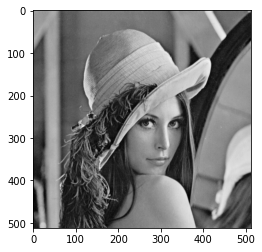

In [6]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Gaussian noise

In [7]:
def generate_gaussian_noise(img, mean=0, std_deviation=1, amplitude=1):
    return img + amplitude * np.random.normal(mean, std_deviation, img.shape)

### Salt and pepper noise

In [8]:
def generate_salt_and_pepper_noise(img, prob=0.0):
    distribution = np.random.uniform(0, 1, img.shape)
    result = np.copy(img)
    result[distribution < prob] = 0
    result[distribution > (1 - prob)] = 255
    return result

### Box filter

In [9]:
def filter_template_func(img, shape, filter_type):
    kernel = generate_kernel(shape)
    result = np.zeros(img.shape, dtype='uint8')
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values = []
            for k in kernel:
                u, v = k
                if valid((i+u, j+v), img.shape):
                    values.append(img[i+u, j+v])
            
            result[i, j] = filter_type(values)
    
    return result

In [10]:
def box_filter(img, shape):
    return filter_template_func(img, shape, np.mean)

### Median filter

In [11]:
def median_filter(img, shape):
    return filter_template_func(img, shape, np.median)

### Opening-then-closing

In [12]:
def opening_then_closing(img, kernel):
    return closing(opening(img, octogonal_kernel), octogonal_kernel)

### Closing-then-opening

In [13]:
def closing_then_opening(img, kernel):
    return opening(closing(img, kernel), kernel)

## Visualization

In [14]:
def visualization(signal, noise, name):
    plt.title(f'{name}, SNR: {calc_signal_to_noise_ratio(signal, noise):.3f}')
    plt.imshow(noise, cmap='gray')
    plt.show()
    
    fig, axs = plt.subplots(3, 2)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    
    a = box_filter(noise, (3, 3))
    axs[0, 0].title.set_text(f'Box_3x3, SNR: {calc_signal_to_noise_ratio(signal, a):.3f}')
    axs[0, 0].imshow(a, cmap='gray')
    
    b = box_filter(noise, (5, 5))
    axs[0, 1].title.set_text(f'Box_5x5, SNR: {calc_signal_to_noise_ratio(signal, b):.3f}')
    axs[0, 1].imshow(b, cmap='gray')
    
    c = median_filter(noise, (3, 3))
    axs[1, 0].title.set_text(f'Median_3x3, SNR: {calc_signal_to_noise_ratio(signal, c):.3f}')
    axs[1, 0].imshow(c, cmap='gray')
    
    d = median_filter(noise, (5, 5))
    axs[1, 1].title.set_text(f'Median_5x5, SNR: {calc_signal_to_noise_ratio(signal, d):.3f}')
    axs[1, 1].imshow(d, cmap='gray')
    
    e = opening_then_closing(noise, octogonal_kernel)
    axs[2, 0].title.set_text(f'Opening-then-closing SNR: {calc_signal_to_noise_ratio(signal, e):.3f}')
    axs[2, 0].imshow(e, cmap='gray')
    
    f = closing_then_opening(noise, octogonal_kernel)
    axs[2, 1].title.set_text(f'Closing-then-opening SNR: {calc_signal_to_noise_ratio(signal, f):.3f}')
    axs[2, 1].imshow(f, cmap='gray')
    plt.show()

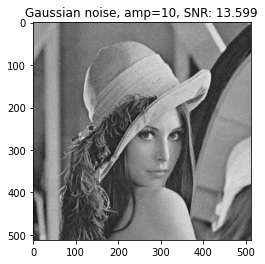

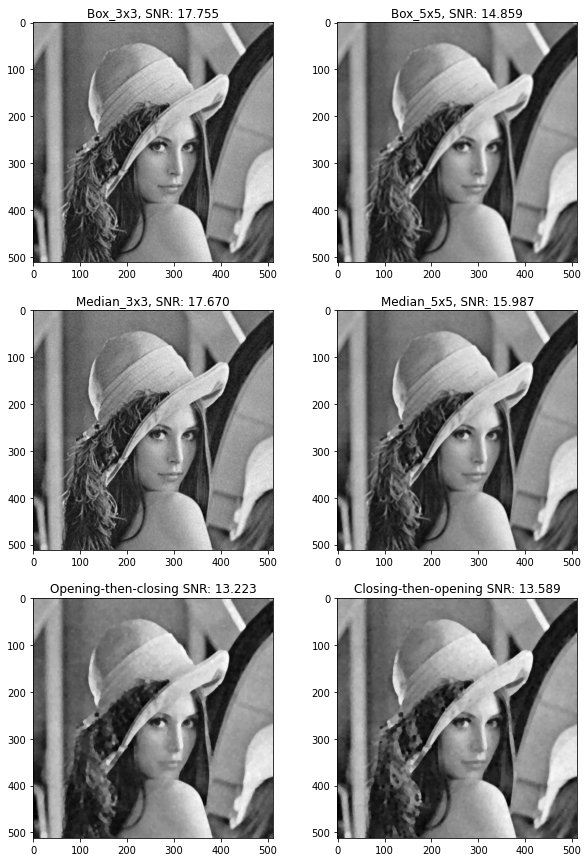

In [15]:
gaussian_noise_10_img = generate_gaussian_noise(img, amplitude=10)
visualization(img, gaussian_noise_10_img, 'Gaussian noise, amp=10')

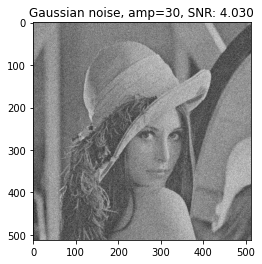

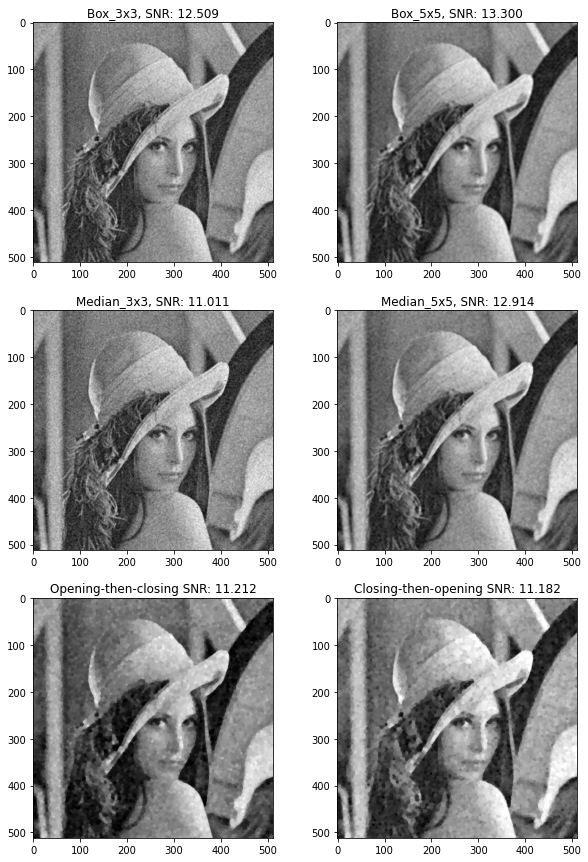

In [16]:
gaussian_noise_30_img = generate_gaussian_noise(img, amplitude=30)
visualization(img, gaussian_noise_30_img, 'Gaussian noise, amp=30')

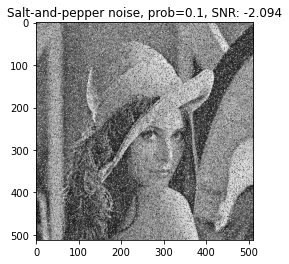

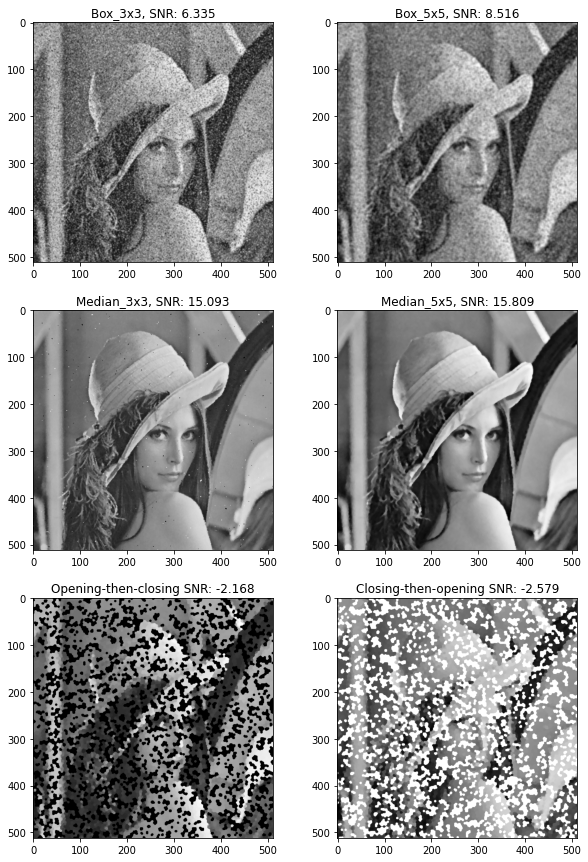

In [17]:
salt_pepper_noise_10_img = generate_salt_and_pepper_noise(img, prob=0.1)
visualization(img, salt_pepper_noise_10_img, 'Salt-and-pepper noise, prob=0.1')

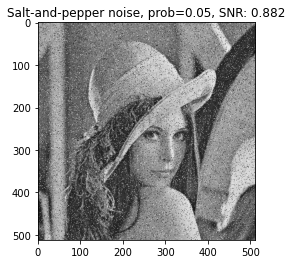

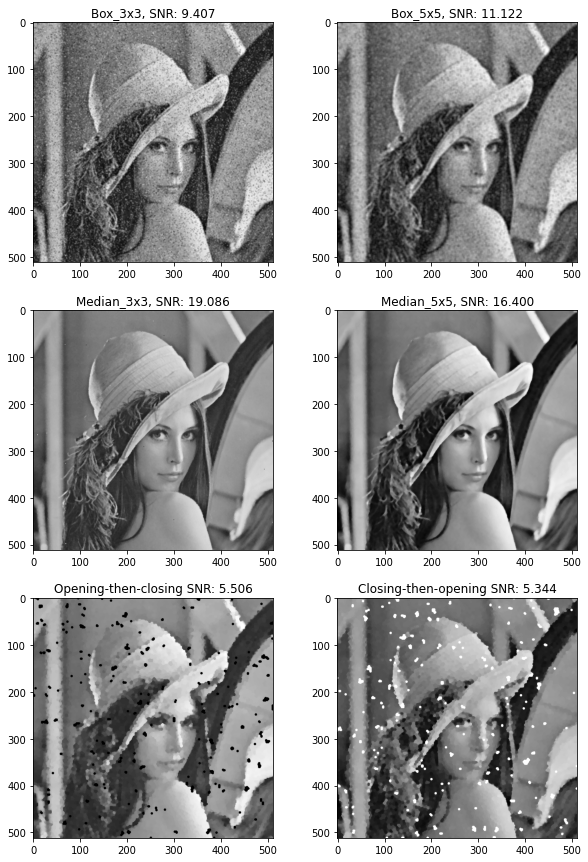

In [18]:
salt_pepper_noise_05_img = generate_salt_and_pepper_noise(img, prob=0.05)
visualization(img, salt_pepper_noise_05_img, 'Salt-and-pepper noise, prob=0.05')